In [1]:
import astropy.units as u
from astropy.constants import c as speed_of_light
from astropy.coordinates import EarthLocation, get_moon, solar_system_ephemeris
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS, get_moon, get_sun, get_body
from astropy.time import Time
from datetime import datetime
from astropy.table import Table
import numpy as np

import pandas as pd 

import astropy.constants
import astropy.units as u

import matplotlib.pyplot as plt
from matplotlib.dates import num2date
from matplotlib.ticker import FuncFormatter
from datetime import datetime

In [2]:
# De Bilt
debilt = EarthLocation(
    lat=52.1018688270963, lon=5.17973411317635, height=51, ellipsoid="WGS84"
)

# Dwingeloo
dwingeloo = EarthLocation(
    lat=52.81213723180477, lon=6.396346463227839, height=70.26, ellipsoid="WGS84"
)

# DSES
dses = EarthLocation(
 lat=38.380858820761304, lon = -103.15636992976087, height=1310 , ellipsoid="WGS84"
)

# Stockert
stockert = EarthLocation(
 lat=50.56944039751571, lon = 6.721943350231514, height=434 , ellipsoid="WGS84"
)

In [3]:
time = Time("2025-03-22T00:00:00Z")+np.arange(24*1*6)*10*u.min

solar_system_ephemeris.set('de432s') 

name = "Venus"

dw_c = get_body('venus', time, dwingeloo) 
dw_altaz = dw_c.transform_to(AltAz(obstime=time,location=dwingeloo))

dses_c = get_body('venus', time, dses)
dses_altaz = dses_c.transform_to(AltAz(obstime=time,location=dses))

stockert_c = get_body('venus', time, stockert)
stockert_altaz = stockert_c.transform_to(AltAz(obstime=time,location=stockert))

dw_sun = get_body('sun', time, dwingeloo) 
dses_sun = get_body('sun', time, dses) 
sun_altaz = dw_sun.transform_to(AltAz(obstime=time,location=dwingeloo))

dw_altaz[0]

<SkyCoord (AltAz: obstime=2025-03-22T00:00:00.000, location=(3839348.429491, 430404.028114, 5057990.45310178) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, km)
    (7.27286663, -27.85822955, 41990049.64344976)>

In [4]:
t_cet = dw_altaz.obstime+ 1*u.h

In [5]:
a = np.asarray([ dw_altaz.obstime.value, t_cet, dw_altaz.alt.value, dses_altaz.alt.value ]).T
df = pd.DataFrame(a)
df.to_csv("venus_elevation_dwingeloo_dses.csv", index=False, header=("time_utc","time_cet","elevation_dw", "elevation_dses"))

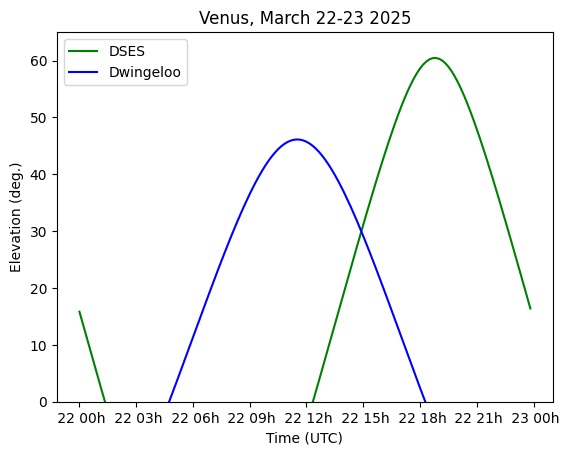

In [6]:
fig, ax = plt.subplots()

ax.plot(time.datetime, dses_altaz.alt.value, "-", 
        color="green", label="DSES");
ax.plot(time.datetime, dw_altaz.alt.value, "-", 
        color="blue", label="Dwingeloo");
# ax.plot(time.datetime, stockert_altaz.alt.value, "-", 
#         color="lightblue", label="Stockert");
ax.set_ylim(0,65);
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %H:%M}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus, March 22-23 2025");
ax.legend();
ax.set_xlabel("Time (UTC)");
ax.set_ylabel("Elevation (deg.)");

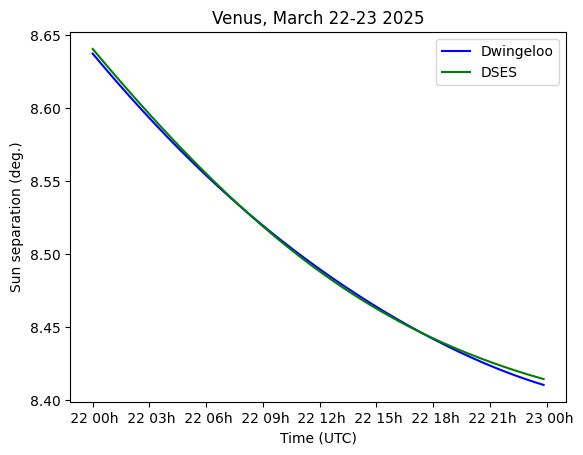

In [7]:
sep = dw_c.separation(dw_sun)

fig, ax = plt.subplots()

ax.plot(time.datetime, sep.value, "-", 
        color="blue", label="Dwingeloo");
ax.plot(time.datetime, dses_c.separation(dses_sun).value, "-", 
        color="green", label="DSES");

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %H:%M}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus, March 22-23 2025");
ax.legend();
ax.set_xlabel("Time (UTC)");
ax.set_ylabel("Sun separation (deg.)");


41973362.718052916 km


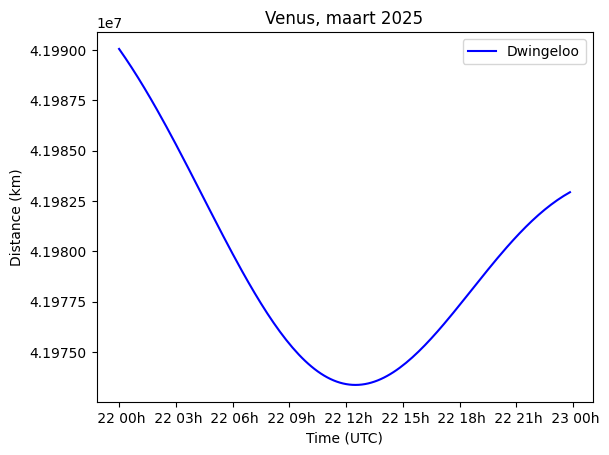

In [8]:
fig, ax = plt.subplots()

ax.plot(time.datetime, dw_altaz.distance.value, "-", 
        color="blue", label="Dwingeloo");
# ax.plot(time.datetime, dses_altaz.alt.value, "-", 
#         color="green", label="DSES");

# ax.set_ylim(0,65);
# ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d-%m}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus, maart 2025");
ax.legend();
ax.set_xlabel("Time (UTC)");
ax.set_ylabel("Distance (km)");


distance_venus = np.min(dw_altaz.distance.value)
print(distance_venus,"km")

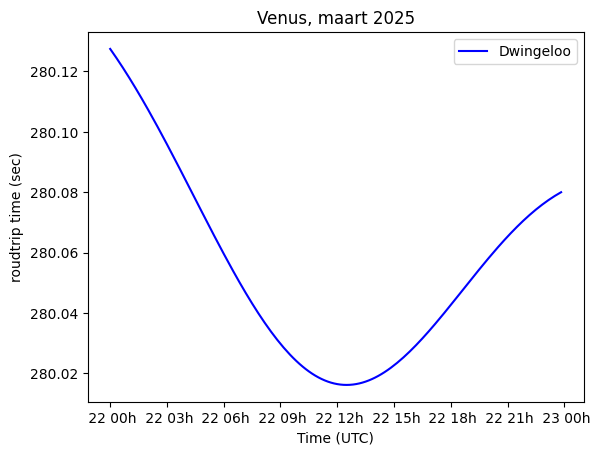

In [9]:
fig, ax = plt.subplots()

ax.plot(time.datetime, 2*1000*dw_altaz.distance.value/astropy.constants.c.value, "-", 
        color="blue", label="Dwingeloo");
# ax.plot(time.datetime, dses_altaz.alt.value, "-", 
#         color="green", label="DSES");

# ax.set_ylim(0,65);
# ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d-%m}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus, maart 2025");
ax.legend();
ax.set_xlabel("Time (UTC)");
ax.set_ylabel("roudtrip time (sec)");


In [10]:
time = Time("2025-03-22T00:00:00Z")+np.arange(365*2)*u.day
dw_c = get_body('venus', time, dwingeloo) 
dw_altaz = dw_c.transform_to(AltAz(obstime=time,location=dwingeloo))

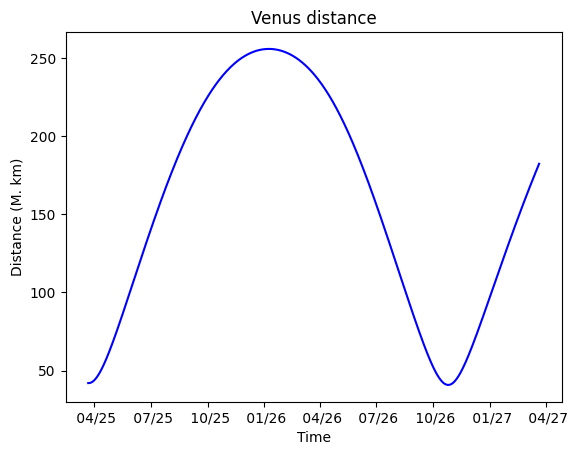

In [11]:
fig, ax = plt.subplots()
ax.plot(time.datetime, dw_altaz.distance.value/1e6, "-", color="blue", label="Dwingeloo");
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %m/%y}"))
ax.set_title("Venus distance");
ax.set_xlabel("Time");
ax.set_ylabel("Distance (M. km)");

In [12]:
f = 1.299 # Ghz
diameter = 25; # Dwingeloo
f_D = 0.48;

In [13]:
radius = diameter/2;
l = astropy.constants.c.value/(f*1e9)
hpbw = 60 * l/diameter;
print(hpbw)

0.5538890678983833


In [14]:
# Squint loss only for s-band at Dwingeloo
dt_squint_loss = 0 #dB

efficiency = 0.69 * 10**(dt_squint_loss/10);
Ae = efficiency * ((np.pi * diameter**2)/4)
gain = 4 * np.pi * Ae / (l**2)
print(10*np.log10(gain))

49.02605749759799


In [15]:
# Venus 23cm
# March 22/23 2025

# Receiving dish
# DSES 18
# Dwingeloo 25
diameter_dses = 25
Ae_dses = efficiency * ((np.pi * diameter_dses**2)/4)
gain_dses = 4 * np.pi * Ae_dses / (l**2)
print("Gain:", (10*np.log10(gain_dses)))

# d_venus = 42e9;
d_venus = distance_venus*1000;
print("Distance Venus:", d_venus/1e3,"km")

sigma = (1*np.pi*6050e3**2)*0.15

# p_tx = 1500e3; # DSES
# p_tx = 120e3; # Dwingeloo LP
p_tx = 1000e3 * 10**(-3.0/10) # Dwingeloo HP with loss to front-end

other_losses = -2 # dB (everything else, e.g. polarization, doppler spread)

pr = (p_tx*gain_dses*Ae*sigma*1)/((4*np.pi)**2*d_venus**4)*10**(other_losses/10)
print("Power received:", 10*np.log10(pr), "dBm")

Gain: 49.02605749759799
Distance Venus: 41973362.718052916 km
Power received: -185.2113816512772 dBm


In [16]:
loss = 10*np.log10((l**2*sigma)/((4*np.pi)**3*d_venus**4))+other_losses
print("Loss: ", loss, "dB")
print("Power received:", (10*np.log10(p_tx)+10*np.log10(gain)+10*np.log10(gain_dses)+loss ), "dBm")

Loss:  -340.2634966464732 dB
Power received: -185.2113816512772 dBm


In [17]:
Tsys = 65 # Dwingeloo
N0 = 10*np.log10(Tsys * astropy.constants.k_B.value)+30
print("N0:",N0, "dBm/Hz")

N0: -180.47003360678912 dBm/Hz


In [18]:
print("SNR 1 Hz: ",10*np.log10(pr)-N0 )
print("SNR 2500 Hz: ",10*np.log10(pr)-N0-10*np.log10(2500) )

SNR 1 Hz:  -4.741348044488092
SNR 2500 Hz:  -38.72074813120847


In [19]:
# Y factor, SNNR
Psys = 10**(N0/10)
Pvenus = Psys+pr
Y = Pvenus/Psys
print("SNNR:",10*np.log10(Y), "dB (in 1Hz)")

SNNR: 1.2568727667776587 dB (in 1Hz)


In [20]:
# Bochum 2009
# Report: The Venus reflections were 8 to 11 dB below the noise in a 10 Hz equivalent 
#         receiver bandwidth, and showed up on the screen as a "peak" with  0.3 to 0.4 dB SNNR 
f = 2.4 # Ghz
diameter = 20;
radius = diameter/2;
l = astropy.constants.c.value/(f*1e9)
hpbw = 60 * l/diameter;
efficiency = 0.43 * 10**(dt_squint_loss/10); # 43% eff.
Ae = efficiency * ((np.pi * diameter**2)/4)
gain = 4 * np.pi * Ae / (l**2)
d_venus = 42.1e9;
# s-band sigma is lower due to atmospheric asbsorption
sigma = (1*np.pi*6050e3**2)*0.10
p_tx = 5000e3; # 5kW
pr = (p_tx*gain*Ae*sigma*1)/((4*np.pi)**2*d_venus**4)
print("Power received:", 10*np.log10(pr), "dBm")
Tsys = 85 # Bochum
N0 = 10*np.log10(Tsys * astropy.constants.k_B.value)+30
print("N0:",N0, "dBm/Hz")
print("SNR 1 Hz: ",10*np.log10(pr)-N0 )
print("SNR 10 Hz: ",10*np.log10(pr)-N0-10*np.log10(10), "dB" )

Power received: -177.68689886914882 dBm
N0: -179.30497791607476 dBm/Hz
SNR 1 Hz:  1.618079046925942
SNR 10 Hz:  -8.381920953074058 dB


In [21]:
# SPICE
import spiceypy

In [22]:
def doppler(v,f):
    return (1 - v / astropy.constants.c.value) * f

In [23]:
spiceypy.furnsh("kernels/naif0012.tls")
spiceypy.furnsh("kernels/de440s.bsp")
spiceypy.furnsh("kernels/pck00011.tpc")
spiceypy.furnsh("kernels/earth_latest_high_prec.bpc")

In [24]:
# De Bilt
h = 51/1000;
lon =  5.17973411317635;
lat =  52.1018688270963;

[dim, radii] = spiceypy.bodvrd("EARTH", "RADII", 3)
flattening = (radii[0]-radii[2])/radii[0];
debilt_obs = spiceypy.georec(lon*np.pi/180, lat*np.pi/180, h, radii[0], flattening)

# Dwingeloo
h = 70.26/1000;
lon =  6.396346463227839;
lat =  52.81213723180477;

[dim, radii] = spiceypy.bodvrd("EARTH", "RADII", 3)
flattening = (radii[0]-radii[2])/radii[0];
dwingeloo_obs = spiceypy.georec(lon*np.pi/180, lat*np.pi/180, h, radii[0], flattening)

In [25]:
# DSES
h = 1310/1000;
lon = -103.15636992976087;
lat = 38.380858820761304

[dim, radii] = spiceypy.bodvrd("EARTH", "RADII", 3)
flattening = (radii[0]-radii[2])/radii[0];
dses_obs = spiceypy.georec(lon*np.pi/180, lat*np.pi/180, h, radii[0], flattening)

In [26]:
time_astropy = Time("2025-03-22T07:00:00Z")
et = spiceypy.str2et( Time(time_astropy.isot).utc.value )

In [27]:
duration = 12*60*60

In [28]:
v1=np.zeros(int(duration))
v2=np.zeros(int(duration))
v3=np.zeros(int(duration))

In [29]:
# CN+S
# The following values of `abcorr' apply to the
# "reception" case in which photons depart from the
# target's location at the light-time corrected epoch
# et-lt and *arrive* at the observer's location at `et'.

# XCN+S
# The following values of `abcorr' apply to the
# "transmission" case in which photons *depart* from
# the observer's location at `et' and arrive at the
# target's location at the light-time corrected epoch
# et+lt.

In [30]:
for t in range(int(duration)):
    timestamp = Time(time_astropy.isot) + float(t)*u.s
    et = spiceypy.str2et( timestamp.utc.value )
    [azlsta,lt] = spiceypy.azlcpo("ELLIPSOID", "Venus", et, "CN+S", False, True, dwingeloo_obs, "EARTH", "ITRF93")
    v1[t] = 1000*azlsta[3]

In [31]:
for t in range(int(duration)):
    timestamp = Time(time_astropy.isot) + float(t)*u.s
    et = spiceypy.str2et( timestamp.utc.value )
    [azlsta,lt] = spiceypy.azlcpo("ELLIPSOID", "Venus", et, "XCN+S", False, True, dwingeloo_obs, "EARTH", "ITRF93")
    v2[t] = 1000*azlsta[3]

In [32]:
for t in range(int(duration)):
    timestamp = Time(time_astropy.isot) + float(t)*u.s-280*u.s
    et = spiceypy.str2et( timestamp.utc.value )
    [azlsta,lt] = spiceypy.azlcpo("ELLIPSOID", "Venus", et, "XCN+S", False, True, dwingeloo_obs, "EARTH", "ITRF93")
    v3[t] = 1000*azlsta[3]

In [33]:
f0 = 1299e6
f_up = 1299e6

In [34]:
dop_down = doppler(v1,f0)
dop_up = doppler(v2,f_up)
dop_up_corr =  doppler(v3,f_up)

In [35]:
time_range = time_astropy+np.arange(len(dop_down))*u.s

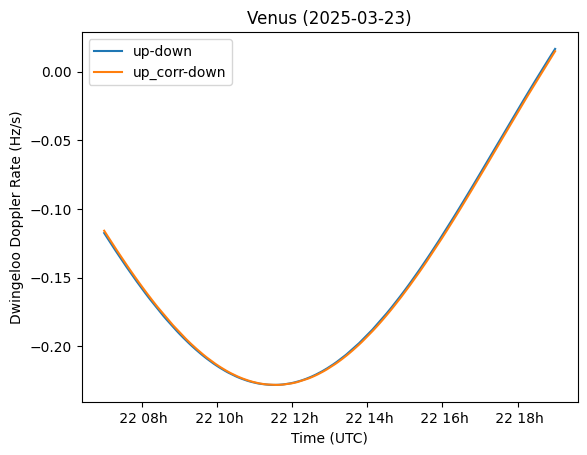

In [36]:
fig, ax = plt.subplots()


ax.plot(time_range.datetime[1:], np.diff(dop_up+dop_down), "-", label="up-down");
ax.plot(time_range.datetime[1:], np.diff(dop_up_corr+dop_down), "-", label="up_corr-down");

ax.set_xlabel("Time (UTC)")

ax.set_ylabel("Dwingeloo Doppler Rate (Hz/s)");
ax.xaxis_date()
ax.legend();
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x):%H:%M}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus (2025-03-23)");

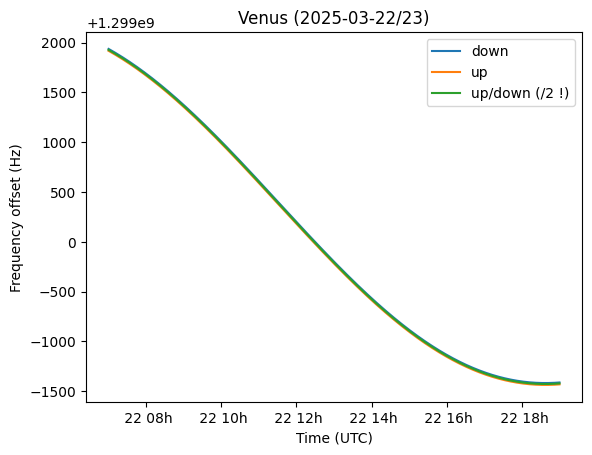

In [37]:
fig, ax = plt.subplots()

ax.plot(time_range.datetime, dop_down, "-", label="down");
ax.plot(time_range.datetime, dop_up, "-", label="up");

ax.plot(time_range.datetime, (dop_up+dop_down)/2, "-", label="up/down (/2 !)");

ax.set_xlabel("Time (UTC)")

ax.set_ylabel("Frequency offset (Hz)");
ax.xaxis_date()
ax.legend();
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x):%H:%M}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus (2025-03-22/23)");

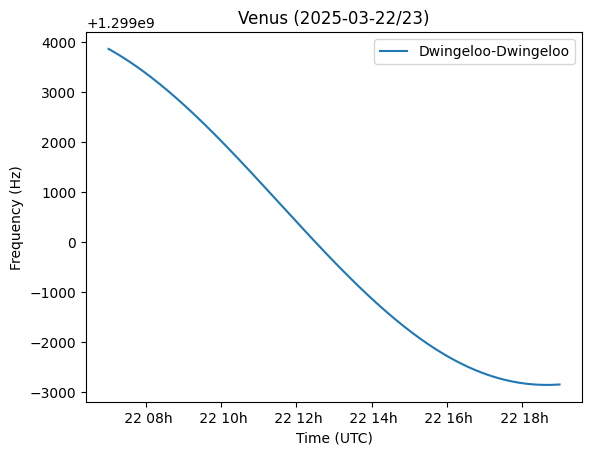

In [38]:
fig, ax = plt.subplots()

ax.plot(time_range.datetime, dop_up_corr+dop_down-f0, "-", label="Dwingeloo-Dwingeloo");

ax.set_xlabel("Time (UTC)")

ax.set_ylabel("Frequency (Hz)");
ax.xaxis_date()
ax.legend();
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x):%H:%M}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{num2date(x): %d %Hh}"))
ax.set_title("Venus (2025-03-22/23)");

In [39]:
# Doppler spreading
# Only taking Venus rotation into account
# work in progress

In [40]:
phi = np.arange(50)*0.01

In [41]:
# Evans/Hagfors, Radar Astronomy, page 306.
# quasi-specular component observed at 23cm 
C = 230
P = (1/(1+(C-2)*phi**2-phi**4*(C-5)/3)**(3/2))

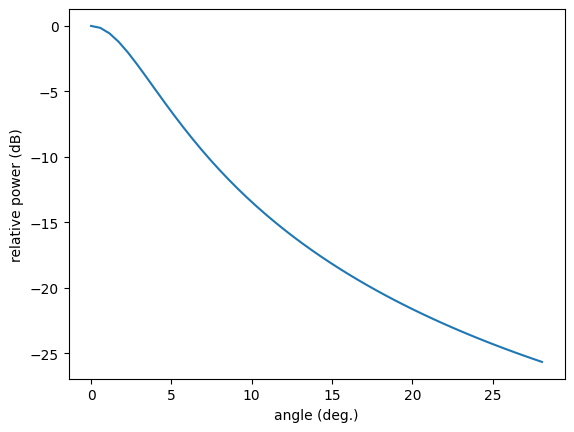

In [42]:
fig, ax = plt.subplots()
ax.plot(phi*180/np.pi, 10*np.log10(P), "-");
ax.set_ylabel("relative power (dB)")
ax.set_xlabel("angle (deg.)");

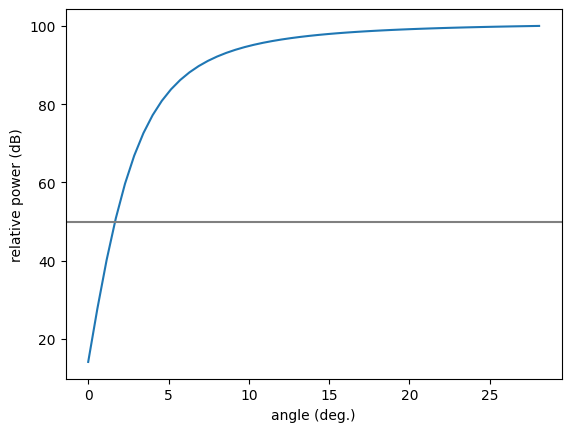

In [43]:
fig, ax = plt.subplots()
ax.plot(phi*180/np.pi, 100*np.cumsum(P)/np.sum(P), "-");
ax.set_ylabel("relative power (dB)")
ax.set_xlabel("angle (deg.)");
ax.axhline(50, color="grey");

In [44]:
# velocity/doppler Venus edge

In [45]:
r = 6050e3
omega = 2*np.pi/(243.025*86400)
v_edge = r*omega
print("V_edge:", v_edge, "m/s")

V_edge: 1.8103833581191395 m/s


In [46]:
# in Hz
doppler(v_edge,f0)-f0

-7.84438681602478

In [47]:
phi = np.arange(50)*0.01 # in radians

In [48]:
# *2 because of +/- velocity, and *2 because of up/down doppler...
def doppler_spread(phi, f0):
    r = 6050e3
    omega = 2*np.pi/(243.025*86400)
    v = r*np.sin(phi)*omega
    return (2*2*(doppler(v,f0)-f0))

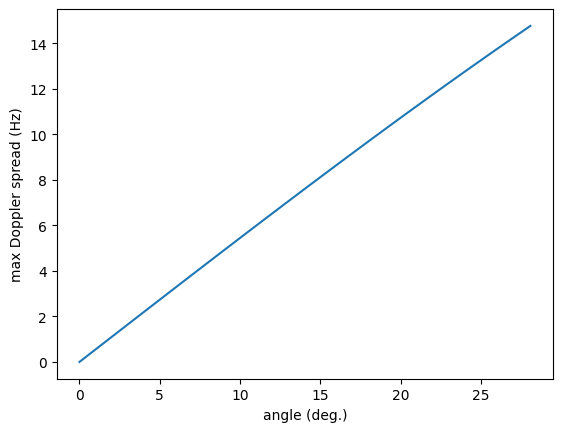

In [49]:
fig, ax = plt.subplots()
ax.plot(phi*180/np.pi, -doppler_spread(phi,f0), "-");
ax.set_ylabel("max Doppler spread (Hz)")
ax.set_xlabel("angle (deg.)");

In [50]:
def echo_power(phi):
    C = 230
    P = (1/(1+(C-2)*phi**2-phi**4*(C-5)/3)**(3/2))
    return P

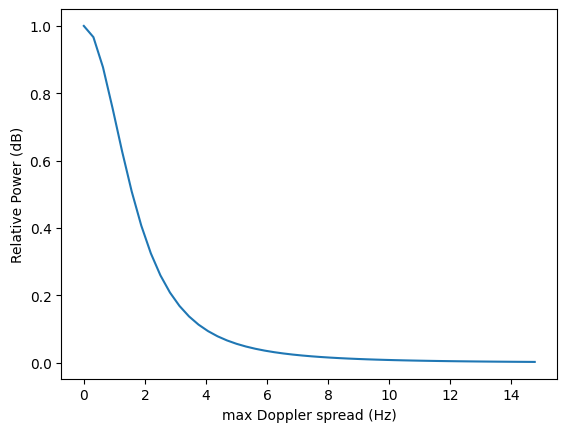

In [51]:
fig, ax = plt.subplots()
ax.plot(-doppler_spread(phi,f0), echo_power(phi), "-");
ax.set_xlabel("max Doppler spread (Hz)")
ax.set_ylabel("Relative Power (dB)");

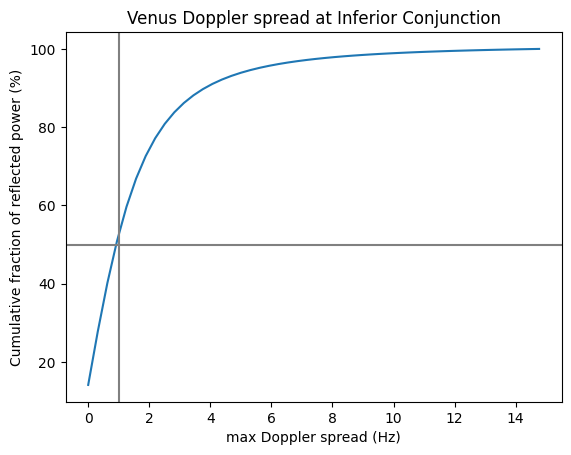

In [52]:
fig, ax = plt.subplots()
ax.plot(-doppler_spread(phi,f0), 100*np.cumsum(echo_power(phi))/np.sum(echo_power(phi)), "-");
ax.set_xlabel("max Doppler spread (Hz)")
ax.set_ylabel("Cumulative fraction of reflected power (%)");
ax.axhline(50, color="grey");
ax.axvline(1, color="grey");
ax.set_title("Venus Doppler spread at Inferior Conjunction");